In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("hospital_appointment.csv")

In [3]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,1,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,2,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,3,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
df = df.rename(columns={'No-show': 'No_show'})
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [5]:
df["No_show"]=df["No_show"]
df["No_show"].replace("No",0,inplace=True)
df["No_show"].replace("Yes",1,inplace=True)

In [6]:
df["No_show"].unique()

array([0, 1], dtype=int64)

In [7]:
df['Year']=pd.to_datetime(df['ScheduledDay']).dt.year

df['Year'].unique()

array([2016, 2015])

# Gender wise how many % patient not comming hospital on his appointment

In [8]:
Total_M_F_booking=df[['No_show','Gender']].groupby('Gender').count()
noshow_onbooking=df[['No_show','Gender']].groupby('Gender').sum()

shows_onbooking= Total_M_F_booking  -  noshow_onbooking

shows_percent=shows_onbooking/Total_M_F_booking * 100

notcame_percent =(noshow_onbooking/Total_M_F_booking * 100).round(2)
notcame_percent

,No_show
Gender,
F,20.31
M,19.97


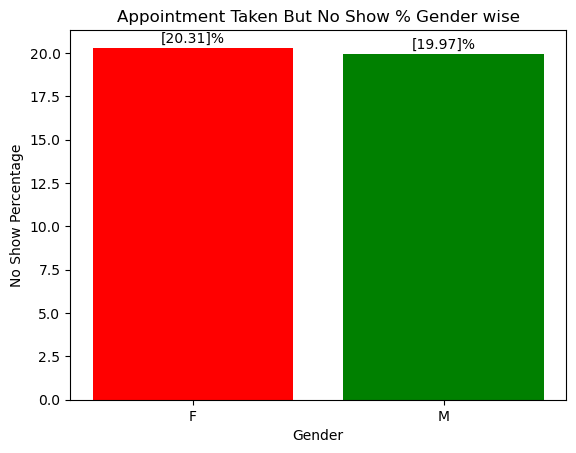

In [9]:
offset=0.3
plt.bar(x=notcame_percent.index,height=notcame_percent.No_show,color=['red','green'])

for i ,v in enumerate(notcame_percent.values):
    plt.text(notcame_percent.index[i],notcame_percent.values[i]+offset ,str(f"{v}%"),ha="center")

plt.title("Appointment Taken But No Show % Gender wise")
plt.xlabel("Gender")
plt.ylabel("No Show Percentage")
plt.show()



# Gender Wise % Appointment Booking In Hospital

In [10]:
total_rows = df.shape[0]
gender_percent_appoinment=pd.DataFrame(Total_M_F_booking/total_rows*100).round(2)
gender_percent_appoinment

,No_show
Gender,
F,65.0
M,35.0


In [11]:
gender_percent_appoinment["Gender"]=gender_percent_appoinment.index
gender_percent_appoinment["Gender"].replace("F","Female",inplace =True)
gender_percent_appoinment["Gender"].replace("M","Male",inplace =True)
#gender_percent_appoinment.drop(columns=['New_gender'], inplace=True)
gender_per=gender_percent_appoinment.drop(columns=["Gender"])
gender_per

,No_show
Gender,
F,65.0
M,35.0


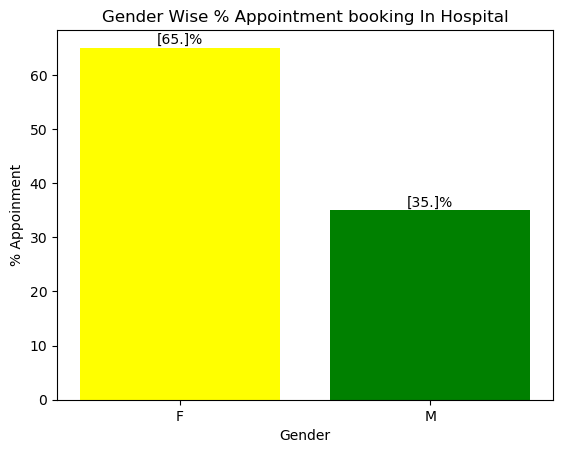

In [12]:
offset=.7
plt.bar(x=gender_per.index, height=gender_per["No_show"],color=["yellow","green"])

for i , j in enumerate(gender_per.values):
    plt.text(gender_per.index[i],gender_per.values[i]+offset,str(f"{j}%"),ha="center")



plt.xlabel("Gender")
plt.ylabel("% Appoinment")
plt.title("Gender Wise % Appointment booking In Hospital")

plt.show()

#  Year wise % No Show of total Appointment  

In [13]:
yearwise_totalbooking=df[["Year","No_show"]].groupby("Year").count()
yearwise_totalbooking

yearwise_noshow=df[["Year","No_show"]].groupby("Year").sum()
yearwise_noshow

df['Year'] = df['Year'].astype('category')

percent_noshow_yearwise=(yearwise_noshow/yearwise_totalbooking *100).round(2)
percent_noshow_yearwise


,No_show
Year,
2015,30.65
2016,20.19


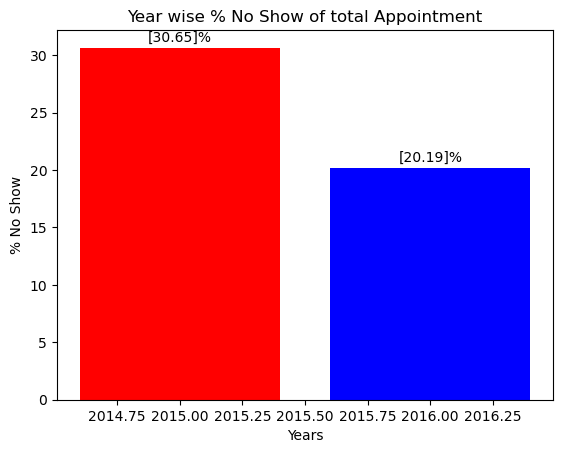

In [14]:
offset=.5
plt.bar(x=percent_noshow_yearwise.index.values,height=percent_noshow_yearwise.No_show,color=["red", "blue"])
for i,j in enumerate(percent_noshow_yearwise.values):
    plt.text(percent_noshow_yearwise.index[i],percent_noshow_yearwise.values[i]+offset,str(f"{j}%"),ha="center")
    
    
plt.title("Year wise % No Show of total Appointment")
plt.xlabel("Years")
plt.ylabel("% No Show")
plt.show()

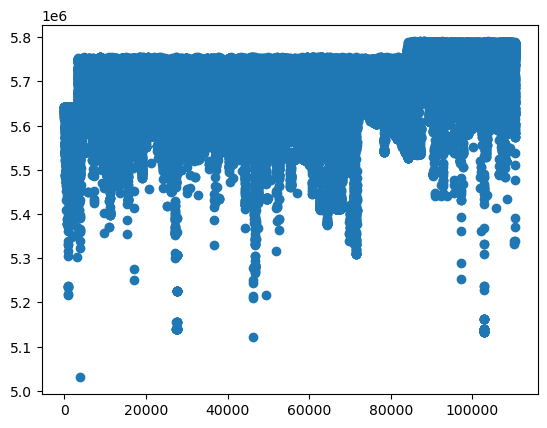

In [15]:
plt.scatter(x=df["PatientId"],y=df["AppointmentID"])
plt.show()

# % No show  When patient SMS Received/Not Received

In [16]:
sms=df[["No_show","SMS_received"]].groupby("SMS_received").sum()
sms

,No_show
SMS_received,
0,12535
1,9784


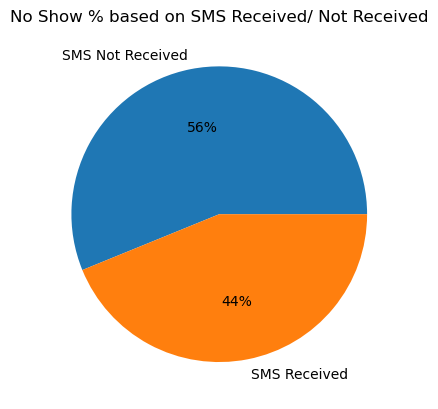

In [17]:
size=sms.No_show
label=sms.index
# Remaning 0 and 1
new_labels = ["SMS Not Received" if val == 0 else "SMS Received" for val in label]
plt.pie(size,labels=new_labels,autopct="%1.0f%%")
plt.title("No Show % based on SMS Received/ Not Received")

plt.show()

# Total no. of Appointment Booking Day Wise

In [18]:
import pandas as pd
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Extract the day names and store them in a new column named 'day_name'
df['Day'] = df['ScheduledDay'].dt.strftime('%A')


In [19]:
df['Day'].unique()

array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'],
      dtype=object)

In [20]:
noshow_day=df[["Day","No_show"]].groupby("Day").sum()
noshow_day

,No_show
Day,
Friday,3887
Monday,4561
Saturday,1
Thursday,3700
Tuesday,5291
Wednesday,4879


In [21]:
total_appoinment_daywise=df[["Day","No_show"]].groupby("Day").count()

sorted_total_appoinment_daywise = total_appoinment_daywise.sort_values(by='No_show', ascending=False)
sorted_total_appoinment_daywise

,No_show
Day,
Tuesday,26168
Wednesday,24262
Monday,23085
Friday,18915
Thursday,18073
Saturday,24


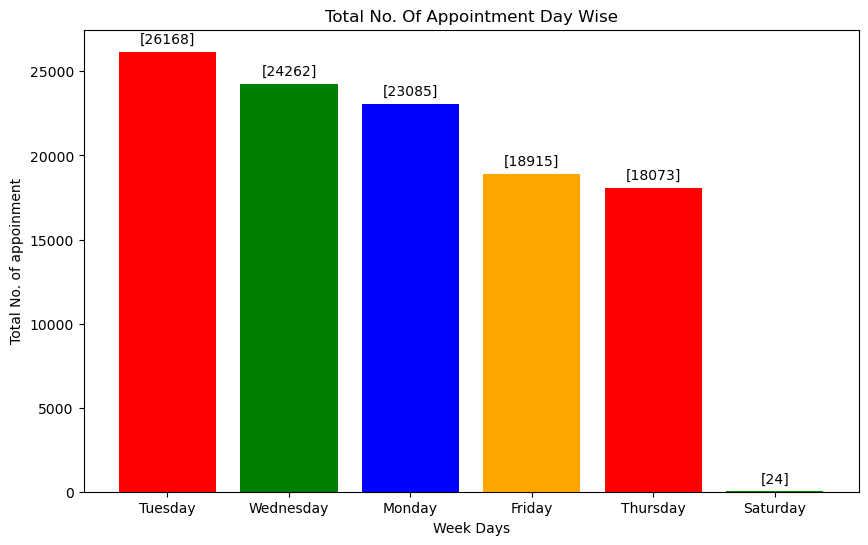

In [22]:
offset = 500
plt.figure(figsize=(10,6))
plt.bar(x=sorted_total_appoinment_daywise.index,height=sorted_total_appoinment_daywise.No_show,color=['red', 'green', 'blue', 'orange'])
for i,j in enumerate(sorted_total_appoinment_daywise.values):
    plt.text(sorted_total_appoinment_daywise.index[i],sorted_total_appoinment_daywise.No_show[i]+offset,str(j),ha='center')

plt.title("Total No. Of Appointment Day Wise")
plt.xlabel("Week Days")
plt.ylabel("Total No. of appoinment")
plt.show()

# How many % patient coming on appointment Day wise

In [23]:
show_day=sorted_total_appoinment_daywise-noshow_day
sort_show_day=show_day.sort_values(by="No_show", ascending=False)
Daywise_persent_shows= (show_day/total_appoinment_daywise*100).round(2)
Daywise_persent_shows

,No_show
Day,
Friday,79.45
Monday,80.24
Saturday,95.83
Thursday,79.53
Tuesday,79.78
Wednesday,79.89


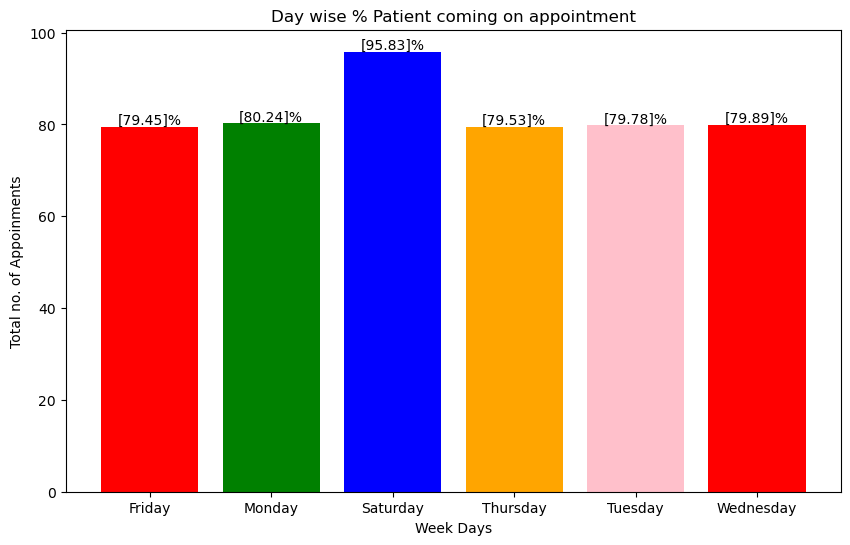

In [24]:
offset=0.5
plt.figure(figsize=(10,6))
bar_width = 0.25
plt.bar(x=Daywise_persent_shows.index,height=Daywise_persent_shows["No_show"],color=['red', 'green', 'blue', 'orange','pink'])

for i,j in enumerate(Daywise_persent_shows.values):
    plt.text(Daywise_persent_shows.index[i],Daywise_persent_shows.No_show[i]+offset,str(f"{j}%"),ha="center")
    
plt.title("Day wise % Patient coming on appointment")
plt.xlabel("Week Days")
plt.ylabel("Total no. of Appoinments")
plt.show()

# How many % patient not coming on appointment day wise

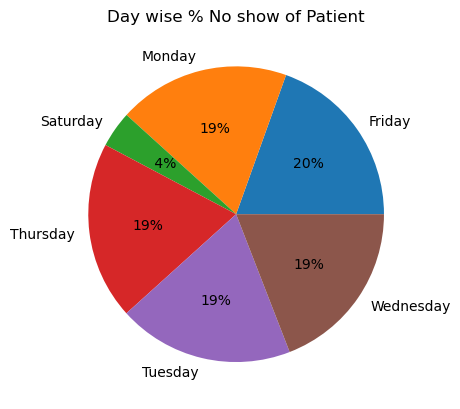

In [25]:
percent_noshow_daywise=(noshow_day/sorted_total_appoinment_daywise*100).round(2)

plt.pie(percent_noshow_daywise.No_show,labels=percent_noshow_daywise.index,autopct="%2.00f%%")

plt.title("Day wise % No show of Patient")
plt.show()

# How many person booking appointment based on Gender Vs Day

In [26]:
df["Gender_num"]=df["Gender"]
df["Gender_num"]= df["Gender_num"].replace("F",0,)
df["Gender_num"]= df["Gender_num"].replace("M",1,)


In [27]:
male_female_total_appoinment=df[["Day","Gender_num"]].groupby("Day").count()
male_appoinment_daywise=df[["Day","Gender_num"]].groupby("Day").sum()
female_appoinment=male_female_total_appoinment - male_appoinment_daywise
male_appoinment_daywise = male_appoinment_daywise.rename(columns={'Gender_num': 'Male'})

In [28]:
# Creating Female , Total_appoinment column in dataframe male_appoinment_daywise
male_appoinment_daywise["Female"]=female_appoinment

male_appoinment_daywise["Total_appoinment"]=male_female_total_appoinment

In [29]:
male_appoinment_daywise

,Male,Female,Total_appoinment
Day,,,
Friday,6822,12093,18915
Monday,8169,14916,23085
Saturday,7,17,24
Thursday,6328,11745,18073
Tuesday,9030,17138,26168
Wednesday,8331,15931,24262


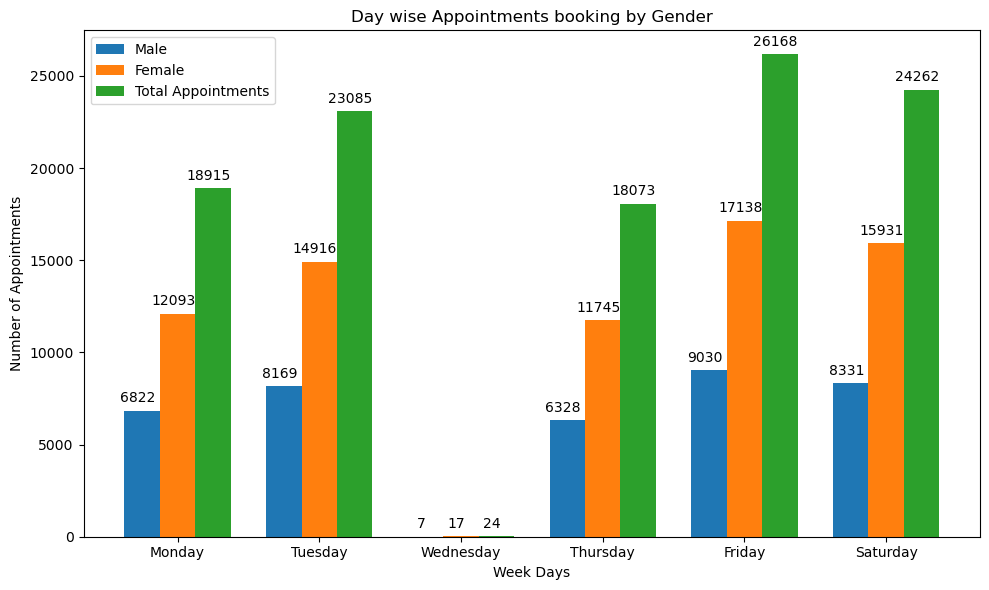

In [30]:
days = ['Monday','Tuesday', 'Wednesday','Thursday','Friday',  'Saturday' ]

plt.figure(figsize=(10, 6))

bar_width = 0.25

# Index for the x-axis
index = range(len(days))

# Plotting bars for Male, Female, and Total_appointment for each day
bars_male=plt.bar(index, male_appoinment_daywise['Male'], bar_width, label='Male')
bars_female=plt.bar([i + bar_width for i in index], male_appoinment_daywise['Female'], bar_width, label='Female')
bars_total=plt.bar([i + 2 * bar_width for i in index], male_appoinment_daywise['Total_appoinment'], bar_width, label='Total Appointments')

# Function to add annotations on top of bars
def add_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(-3, 4),
                     textcoords="offset points",
                     ha='center', va='bottom')

# Adding annotations for each group
add_annotations(bars_male)
add_annotations(bars_female)
add_annotations(bars_total)

    
plt.xlabel('Week Days')
plt.ylabel('Number of Appointments')
plt.title('Day wise Appointments booking by Gender')
plt.xticks([i + bar_width for i in index], days)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# How many Patitent booking Appointment based on Gender and Age bins

In [31]:
# Assuming you have a DataFrame named df with an 'Age' column
# Create bins based on age
bins = [0, 18, 30, 40, 50, 60, 70,80,90 ,120]  # Define your bin edges here

# Define labels for the bins
labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80','80-90','90+']

# Use pd.cut() to create bins based on age
df['Age_Bins'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age_Bins and count the number of people in each bin
#age_counts = df.groupby('Age_Bins').size()

# Display the counts

#pd.DataFrame(age_counts)

In [32]:
# Finding male, female, total appointments
total_appontment_gender=df[["Age_Bins","Gender_num"]].groupby("Age_Bins").count()
male_appointment=df[["Age_Bins","Gender_num"]].groupby("Age_Bins").sum()
female_appointment= total_appontment_gender - male_appointment


In [33]:
# creating male , female and total column in total_appontment_gender df
total_appontment_gender["Male"]=male_appointment["Gender_num"]
total_appontment_gender["Female"]=female_appointment["Gender_num"]
total_appontment_gender["Total"]=total_appontment_gender["Gender_num"]


In [34]:
df_male_female_total=total_appontment_gender.drop(columns=["Gender_num"])
df_male_female_total

,Male,Female,Total
Age_Bins,,,
0-18,13481,13898,27379
18-30,4422,12309,16731
30-40,4404,10767,15171
40-50,4432,9777,14209
50-60,5062,10801,15863
60-70,3818,8058,11876
70-80,1989,3945,5934
80-90,955,1991,2946
90+,124,293,417


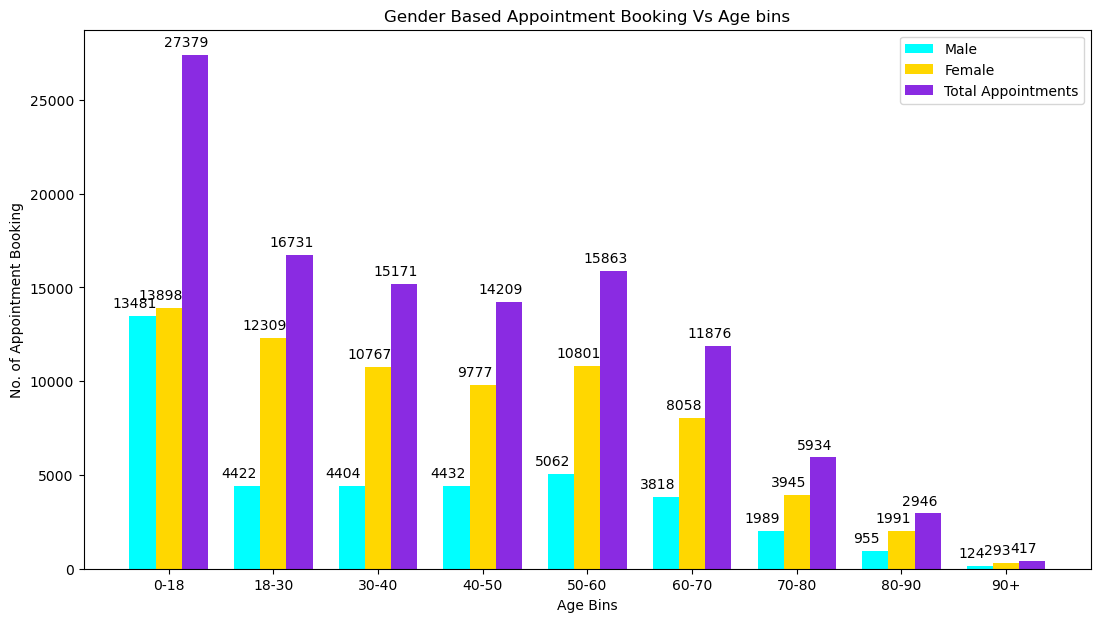

In [35]:
plt.figure(figsize=(13, 7))

bar_width = 0.25

index=range(len(labels))


bars_male=plt.bar(index, df_male_female_total['Male'], bar_width, label='Male',color=["cyan"])
bars_female=plt.bar([i + bar_width for i in index], df_male_female_total['Female'], bar_width, label='Female',color=["gold"])
bars_total=plt.bar([i + 2 * bar_width for i in index], df_male_female_total['Total'], bar_width, label='Total Appointments',color=["blueviolet"])

# Function to add annotations on top of bars
def add_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(-6, 4),
                     textcoords="offset points",
                     ha='center', va='bottom')

# Adding annotations for each group
add_annotations(bars_male)
add_annotations(bars_female)
add_annotations(bars_total)

plt.xticks([i + bar_width for i in index], labels)
plt.title("Gender Based Appointment Booking Vs Age bins")
plt.xlabel("Age Bins")
plt.ylabel("No. of Appointment Booking")
plt.legend()
plt.show()

# How Many Person Booking Appointment Based On illness and Age


In [36]:
patitent_illness =df[["Age_Bins","Hipertension","Diabetes","Alcoholism","Handcap"]].groupby("Age_Bins").sum()
patitent_illness


,Hipertension,Diabetes,Alcoholism,Handcap
Age_Bins,,,,
0-18,38,51,24,286
18-30,258,100,217,248
30-40,1303,362,455,306
40-50,2904,863,927,319
50-60,5685,1946,962,379
60-70,5952,2475,622,346
70-80,3543,1438,124,277
80-90,1848,651,29,249
90+,270,57,0,49


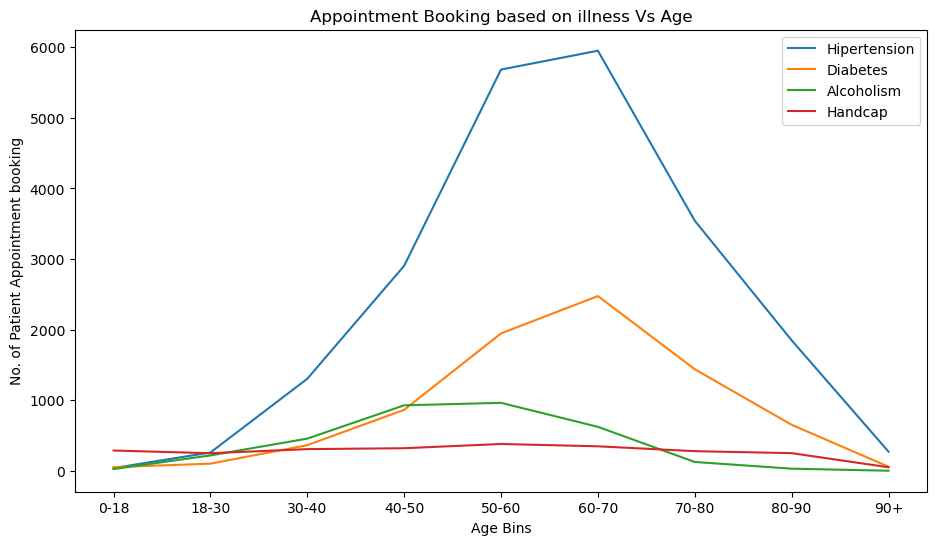

In [37]:
plt.figure(figsize=(11,6))
plt.plot(patitent_illness.index,patitent_illness["Hipertension"],label="Hipertension")
plt.plot(patitent_illness.index,patitent_illness["Diabetes"],label="Diabetes")
plt.plot(patitent_illness.index,patitent_illness["Alcoholism"],label="Alcoholism")
plt.plot(patitent_illness.index,patitent_illness["Handcap"],label="Handcap")

plt.title("Appointment Booking based on illness Vs Age")
plt.xlabel("Age Bins")
plt.ylabel("No. of Patient Appointment booking")
plt.legend()
plt.show()